In [ ]:
# Import necessary libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model

In [ ]:
import tensorflow as tf
base_dir = '/content/drive/MyDrive/Rice_Diseases'
categories = ['Bacterial Blight Disease', 'Blast Disease', 'Brown Spot Disease', 'False Smut Disease']

In [ ]:
import os
from PIL import Image

main_folder = '/content/drive/MyDrive/Rice_Diseases'

for sub_folder in os.listdir(main_folder):
    sub_folder_path = os.path.join(main_folder, sub_folder)

    if os.path.isdir(sub_folder_path):
        for image_file in os.listdir(sub_folder_path):
            image_path = os.path.join(sub_folder_path, image_file)

            # Open and process the image
            with Image.open(image_path) as img:
                img.show()  # or do any processing you'd like


In [ ]:
data = []
labels = []
# Load and preprocess the images
for category in categories:
    category_path = os.path.join(base_dir, category)
    for img in os.listdir(category_path):
        img_path = os.path.join(category_path, img)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (224, 224))  # Resize to match model input size
        data.append(image)
        labels.append(category)

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)


In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    baseModel,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_datagen.flow(trainX, trainY, batch_size=32),
    validation_data=(testX, testY),
    epochs=25,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.2701 - loss: 4.9384 - val_accuracy: 0.3000 - val_loss: 2.1689 - learning_rate: 0.0010
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step - accuracy: 0.4563 - loss: 2.1836 - val_accuracy: 0.7750 - val_loss: 0.8285 - learning_rate: 0.0010
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.4712 - loss: 1.5749 - val_accuracy: 0.8000 - val_loss: 0.5539 - learning_rate: 0.0010
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.6521 - loss: 0.7488 - val_accuracy: 0.7250 - val_loss: 0.6596 - learning_rate: 0.0010
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.7463 - loss: 0.5632 - val_accuracy: 0.8750 - val_loss: 0.4376 - learning_rate: 0.0010
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.7632 - loss: 0.5865 - val_accuracy: 0.8250 - val_loss: 0.5477 - learning_rate: 0.0010
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.8068 - loss: 0.5281 - val_accuracy: 0.6750 - val

In [ ]:
model.save('rice_disease_model.h5')

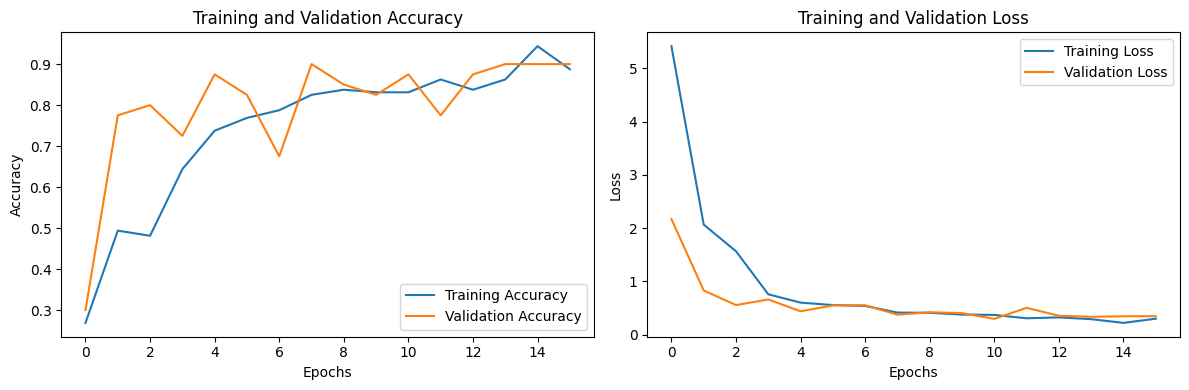

In [ ]:
import matplotlib.pyplot as plt

# Check if 'accuracy' or other keys exist in history.history
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Accuracy or validation accuracy data not found in the training history.")


In [ ]:
sample_image_path = '/content/drive/MyDrive/Rice_Diseases/Bacterial Blight Disease/BB (1).jpg'  # Update with the actual path
sample_image = cv2.imread(sample_image_path)

# Preprocess the image
sample_image = cv2.resize(sample_image, (224, 224))  # Resize to match model input size
sample_image = sample_image / 255.0  # Normalize the image
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension

# Make a prediction
predicted_class = model.predict(sample_image)
predicted_label = categories[np.argmax(predicted_class)]

# Output the predicted label
print(f'Predicted Label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: Bacterial Blight Disease
